<a href="https://colab.research.google.com/github/Facu1317/DataScienceCoder/blob/main/PROYECTO_FINAL_FacundoFernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJETIVO

Predecir si una persona gana o no mas de 50k/año

# MOTIVACION

Este proyecto de Data Science tiene como objetivo investigar las disparidades salariales entre individuos, abordando preguntas cruciales que han intrigado a la sociedad. ¿Por qué algunas personas ganan más que otras? ¿Está relacionado con su trabajo, nivel educativo, edad, raza o género? Utilizando técnicas de Data Science, exploraremos patrones en datos exhaustivos para arrojar luz sobre las razones subyacentes detrás de estas variaciones en los ingresos.


# INTRODUCCION

Importo librerias que usare

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as pl
import plotly.express as px

Creo el dataset

In [74]:
df=pd.read_csv("/content/CENSUS_INCOME.csv")

Ejemplo del dataset

In [3]:
df.sample(30)

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
9447,44,Self-emp-not-inc,208277,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,45,United-States,<=50K
14197,66,Private,201197,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
28496,31,Self-emp-not-inc,265807,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,3137,0,50,United-States,<=50K
24849,45,Federal-gov,183804,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
4621,18,?,191117,11th,7,Never-married,?,Own-child,White,Male,0,0,25,United-States,<=50K
23318,36,Self-emp-not-inc,147258,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,>50K
17928,29,Private,186624,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,Cuba,<=50K
21215,51,Self-emp-inc,194995,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
23875,19,Private,316797,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Own-child,White,Male,0,0,45,Mexico,<=50K
2011,23,Private,161708,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K


# SOBRE EL DATASET

Informacion varia del dataset. Es importante saber los tipos de datos de cada columna y la cantidad de filas/individuos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION-NUM   32561 non-null  int64 
 5   MARITAL-STATUS  32561 non-null  object
 6   OCCUPATION      32561 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL-GAIN    32561 non-null  int64 
 11  CAPITAL-LOSS    32561 non-null  int64 
 12  HOURS-PER-WEEK  32561 non-null  int64 
 13  NATIVE COUNTRY  32561 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [75]:
df.describe()

,AGE,FNLWGT,EDUCATION-NUM,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# ANALISIS UNIVARIADO


## Income

La variable "Income" indica el nivel de ingresos de los individuos en el conjunto de datos. Analizando esta variable, observamos que el 76% de la muestra poblacional gana menos de 50,000 al año, mientras que el 24% restante tiene ingresos superiores a esta cifra. Este desglose proporciona una visión clara de la distribución de ingresos en la población estudiada. Que caracteriza a los afortunados....?


In [5]:
df.INCOME.value_counts(normalize=True)*100

 <=50K    75.919044
 >50K     24.080956
Name: INCOME, dtype: float64

<Axes: xlabel='INCOME', ylabel='Count'>

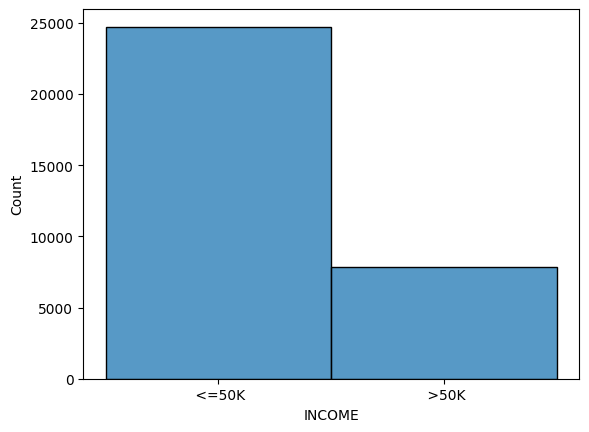

In [6]:
sns.histplot(df,x='INCOME')

## Sexo

La siguiente tabla es usada para el pptx. Me dice el promedio y la cantidad de observaciones del dataset segun sexo. Despues hago el grafico correspondiente.

In [7]:
resultados = df.groupby('SEX')['AGE'].agg(['mean', 'count']).reset_index()
resultados.columns = ['SEX', 'Promedio_Edad', 'Observaciones']
resultados

,SEX,Promedio_Edad,Observaciones
0,Female,36.858230,10771
1,Male,39.433547,21790


<Axes: xlabel='AGE', ylabel='Count'>

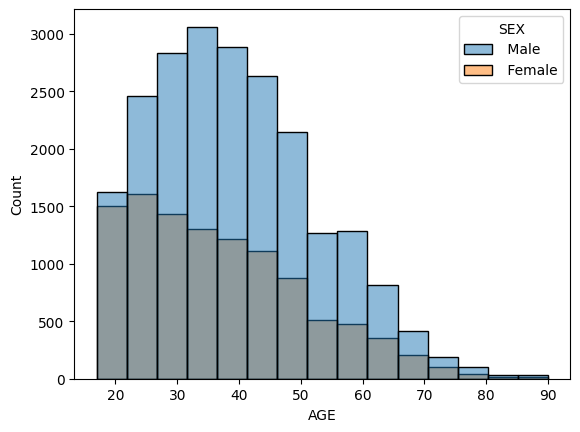

In [8]:
sns.histplot(df,x='AGE',hue="SEX",bins=15)

Vemos una agrupacion por ingresos y raza. Usado el ppt

In [9]:
pd.set_option('display.max_colwidth', 200)
resultados = df.groupby(['RACE','INCOME'])['AGE'].agg(['count']).reset_index()
resultados.columns = ['RACE','INCOME', 'Observaciones']
resultados=resultados.sort_values(by=["INCOME","Observaciones"], ascending=False)

resultados

,RACE,INCOME,Observaciones
9,White,>50K,7117
5,Black,>50K,387
3,Asian-Pac-Islander,>50K,276
1,Amer-Indian-Eskimo,>50K,36
7,Other,>50K,25
8,White,<=50K,20699
4,Black,<=50K,2737
2,Asian-Pac-Islander,<=50K,763
0,Amer-Indian-Eskimo,<=50K,275
6,Other,<=50K,246


Algunos numeritos interesante. Cada 100 personas blancas, el 34% ganas mas de 50k. Cada 100 personas negras, el 15% gana mas de 50k. Cada 100 personas asiaticas, el 35% gana mas de 50k. Cada 100 personas indias,el 14% gana mas de 50k al año. Dejando de lado el origen, solo el color de piel parece influir.


In [ ]:
5804/16985 #White

0.3417132764203709

In [ ]:
322/2218 #Black

0.14517583408476104

In [ ]:
215/618 #Asian

0.3478964401294498

In [ ]:
32/229 #Indian

0.13973799126637554

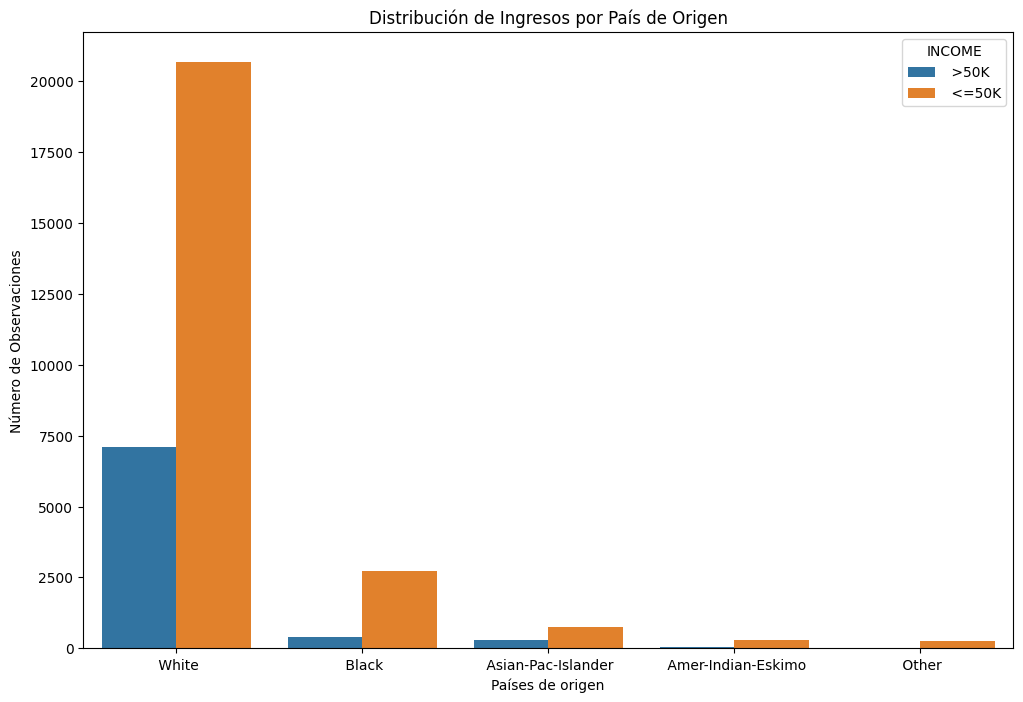

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns



# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='RACE', y='Observaciones', hue='INCOME', data=resultados)

# Añadir etiquetas y título
bar_plot.set_xlabel('Países de origen')
bar_plot.set_ylabel('Número de Observaciones')
bar_plot.set_title('Distribución de Ingresos por País de Origen')

# Mostrar el gráfico
plt.show()

# ANALISIS BIVARIADO

**Procedo a analizar diferentes correlaciones entre diferentes variables categoricas. Ademas del grafico, a continuacion se vera la metrica que indica objetivamente si hay relacion o no. Objetivamente ya que por mas que el grafico pueda sugerir algo, al evaluar la muestra detalladamente mediante indicadores matematicos nos pueden dar mejor idea de donde estamos parados.**

**Esto es con fines de practicar lo visto en clases. Mas adelante que paso todas las variables a numericas, es muy sencillo ver correlaciones.**

## Ingresos y sexo

Como afecta el genero a pertenecer al club de los >50k o no?

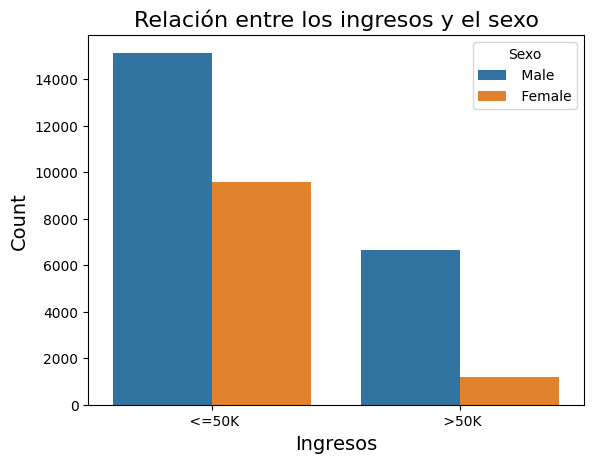

In [11]:
sns.countplot(x='INCOME', hue='SEX', data=df)

# Ajustar el diseño
plt.title('Relación entre los ingresos y el sexo', fontsize=16)
plt.xlabel('Ingresos', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.show()

Creamos una funcion para calcular la correlacion entre dos variables categoricas. En este caso si gana o no mas de 50k y el sexo. La funcion nos servira en otros momentos por eso es importante crearla. La función utiliza una tabla de contingencia (organizando datos categóricos en una matriz), realiza la prueba de chi-cuadrado (evaluando la independencia entre las variables categóricas) y, finalmente, calcula el estadístico de Cramer's V (una medida normalizada de la fuerza de la asociación entre las variables categóricas).

In [12]:
import scipy.stats as stats
from sklearn.feature_selection import chi2



# Size of the sample
n = len(df)



def corr_cat_cat(col1,col2):
  #tabla de contigencia
  cont_table = pd.crosstab(index= df[col1],
                          columns= df[col2])
  X2 = stats.chi2_contingency(cont_table)
  k=min(cont_table.shape)
  chi_stat = X2[0]

  # Calculate Cramer's V
  V = np.sqrt((chi_stat/n) / (k-1))
  return V

La correlacion nos da :

In [13]:
corr_cat_cat('INCOME','SEX')

0.21590381954916826

## Educacion y raza

Text(0.5, 1.0, 'Relación entre nivel de educacion y la raza')

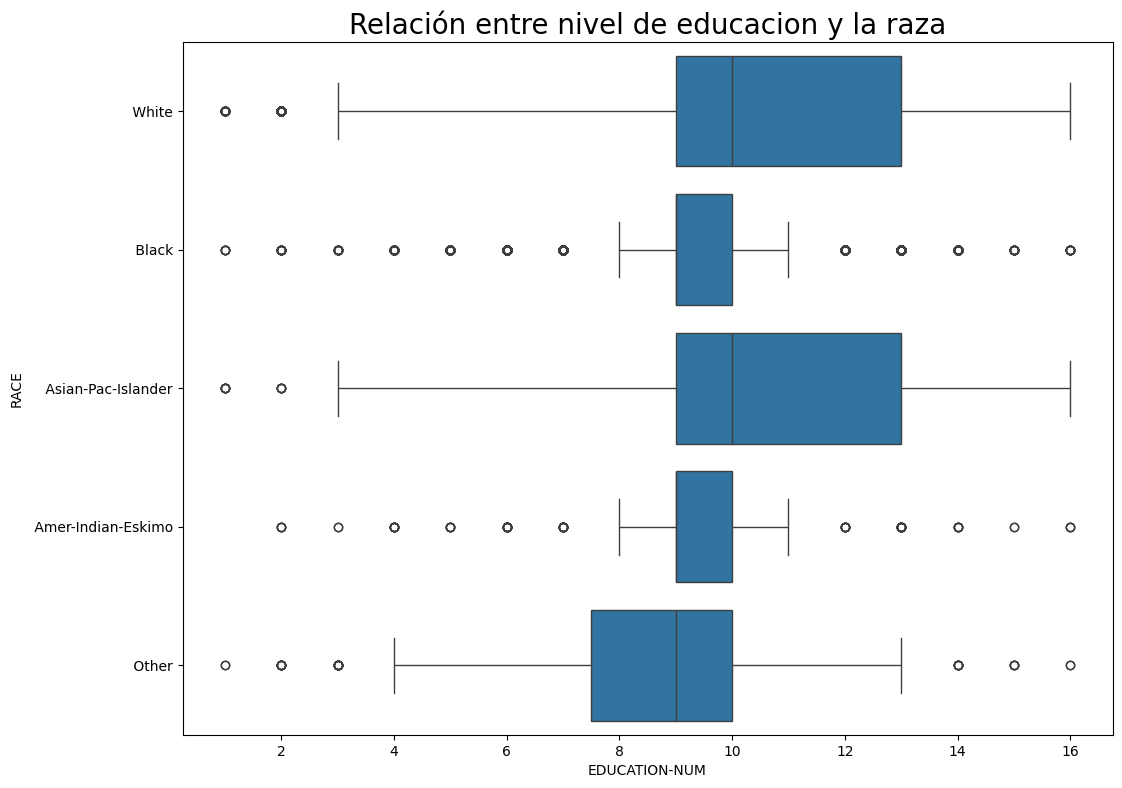

In [14]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data=df,x="EDUCATION-NUM",y="RACE")
plt.title('Relación entre nivel de educacion y la raza', fontsize = 20)

Con el test de anova no podemos ver un numero que nindique la correlacion sino mas bien un numero que diga si hay diferencia significativa entre la raza y el numero de educacion. Los valores parecen indicar que si.

ANOVA F-statistic: 99.05: Este es el estadístico F calculado durante el análisis de varianza. Un valor grande de este estadístico sugiere que hay diferencias significativas entre al menos dos de las medias de los grupos.

P-value: 0.000 (o cercano a cero): Este valor p es extremadamente pequeño, indicando que la probabilidad de obtener un resultado tan extremo (o más extremo) bajo la hipótesis nula (que todas las medias son iguales) es prácticamente nula. En términos prácticos, un valor p tan pequeño sugiere fuertemente que hay diferencias significativas entre al menos dos de las medias de los grupos.

In [15]:

from scipy.stats import f_oneway
anova_result = f_oneway(*[df['EDUCATION-NUM'][df['RACE'] == category] for category in df['RACE'].unique()])

print(f"ANOVA F-statistic: {anova_result.statistic:.2f}")
print(f"P-value: {anova_result.pvalue:.3f}")

ANOVA F-statistic: 99.05
P-value: 0.000


## Educacion e ingresos

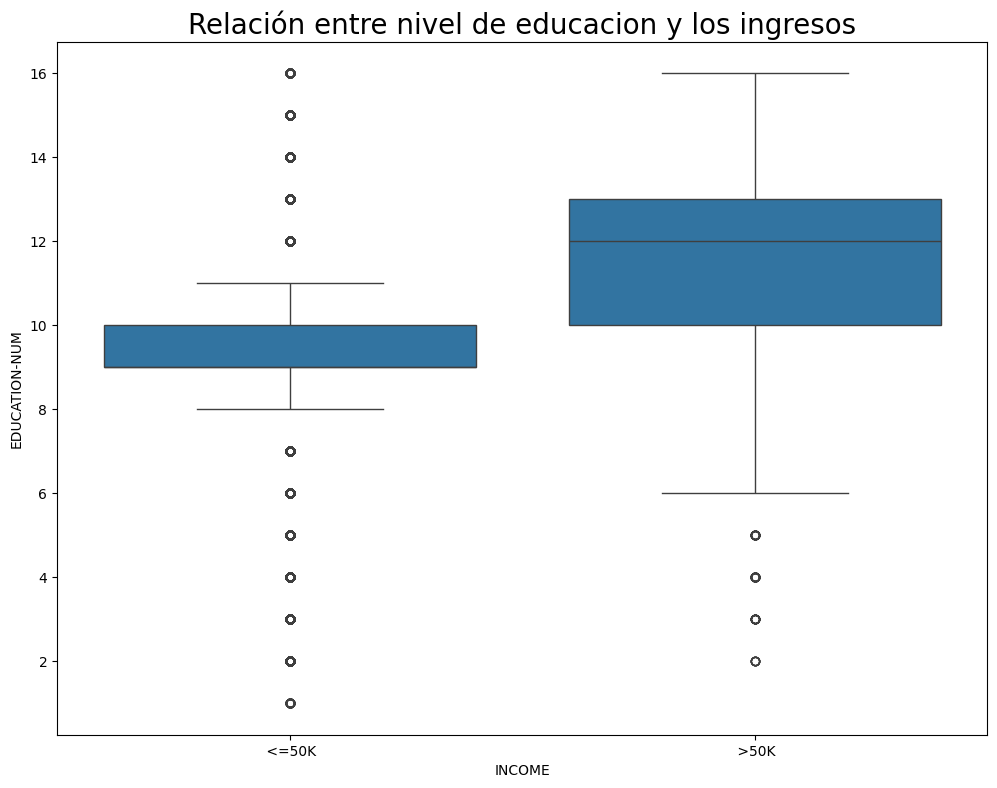

In [16]:

sns.boxplot(x='INCOME', y='EDUCATION-NUM', data=df)
plt.title('Relación entre nivel de educacion y los ingresos', fontsize = 20)

plt.show()

Una correlacion entre ingresos y eduacion del 33%

In [17]:

from sklearn.preprocessing import LabelEncoder
from scipy import stats
le = LabelEncoder()
#le.fit_transform(df['NATIVE COUNTRY'])
a = le.fit_transform(df['INCOME'])
b = df["EDUCATION-NUM"]

stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.335153952690941, pvalue=0.0)

## Edad e ingresos

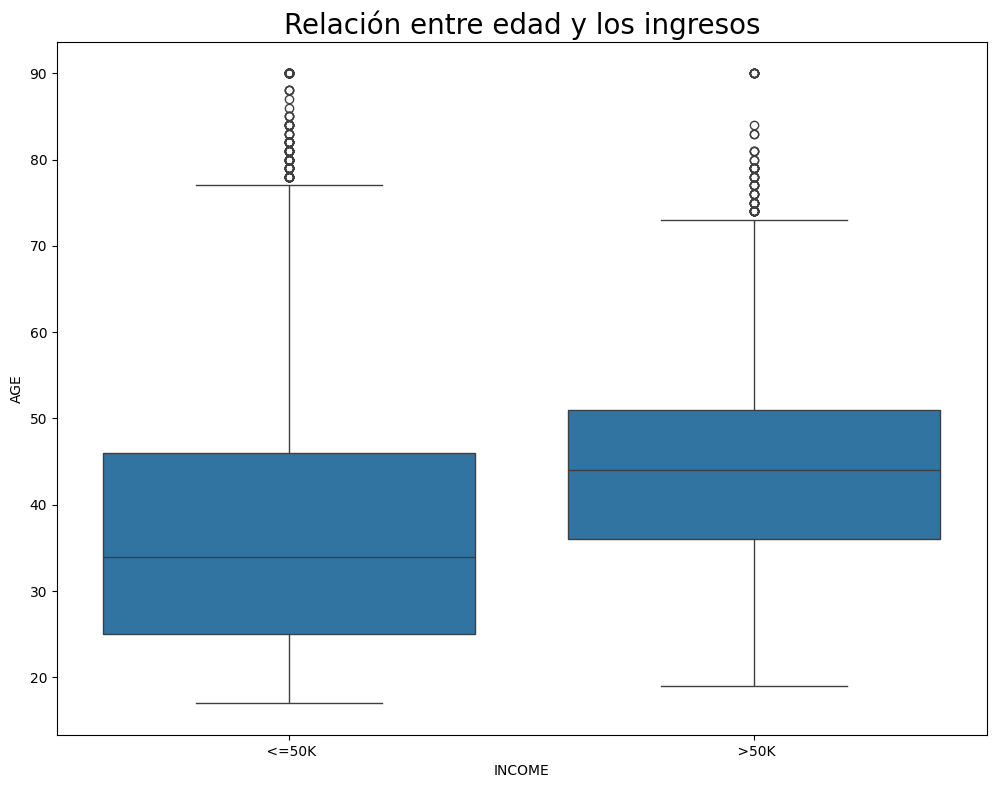

In [18]:

sns.boxplot(x='INCOME', y='AGE', data=df)
plt.title('Relación entre edad y los ingresos', fontsize = 20)

plt.show()

Correlacion entre edad e ingresos del 23%

In [19]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
le = LabelEncoder()
#le.fit_transform(df['NATIVE COUNTRY'])
a = le.fit_transform(df['INCOME'])
b = df["AGE"]

stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.2340371026488576, pvalue=0.0)

## Hs trabajadas e ingresos

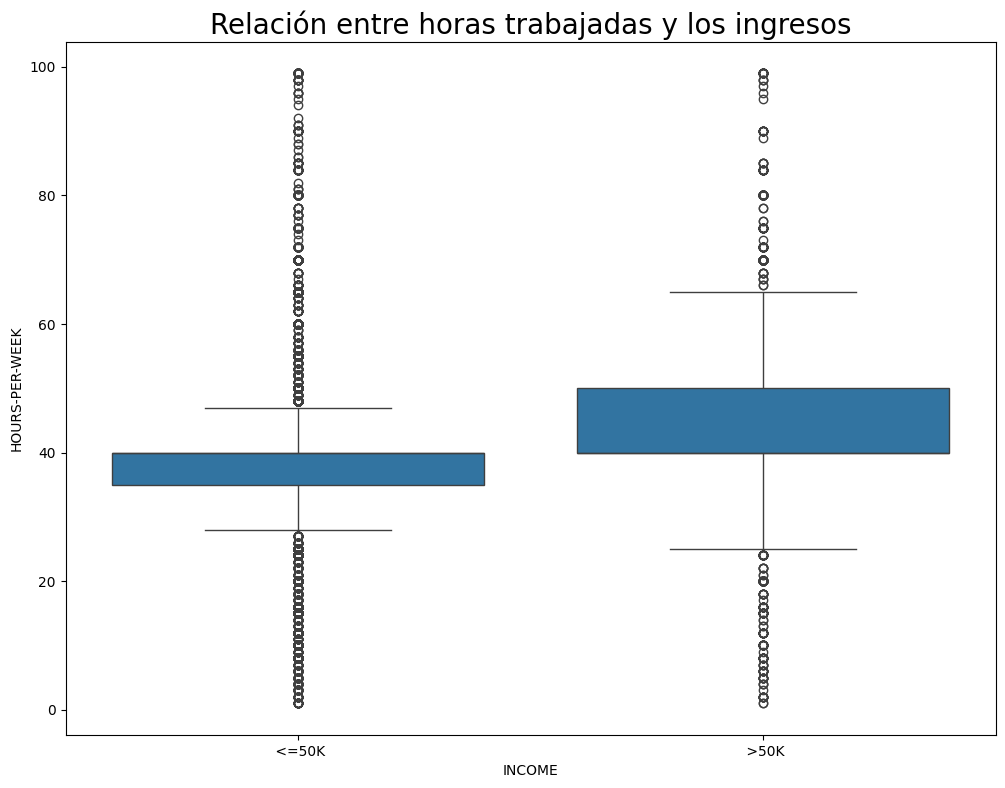

In [20]:
plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(x='INCOME', y='HOURS-PER-WEEK', data=df)
plt.title('Relación entre horas trabajadas y los ingresos', fontsize = 20)

plt.show()

Correlacion entre ingresos y horas trabajadas del 23%

In [21]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
le = LabelEncoder()
#le.fit_transform(df['NATIVE COUNTRY'])
a = le.fit_transform(df['INCOME'])
b = df["HOURS-PER-WEEK"]

stats.pointbiserialr(a, b)

SignificanceResult(statistic=0.2296890656708105, pvalue=0.0)

# DATA WRANGLING

In [22]:
df=pd.read_csv("/content/CENSUS_INCOME.csv")

Debido al hecho de que aquellos que tuvieron una ganancia superior a 50000 de capital van a tener claramente un income mayor a 50k, decido sacar esa columna

In [23]:
df[df['CAPITAL-GAIN']>50000]

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
1246,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1368,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1482,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1528,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1616,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
31972,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
32090,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
32238,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [24]:
df=df.drop(["CAPITAL-GAIN","CAPITAL-LOSS"],axis=1)

## **Categoricas a numericas, eliminacion de variables**

Decido pasar todas las variables categoricas a numericas. Para poder armar los modelos predictivos.

### Marital - Status

Empezamos por MARITAL-STATUS

In [25]:
df['MARITAL-STATUS'].values

array([' Never-married', ' Married-civ-spouse', ' Divorced', ...,
       ' Widowed', ' Never-married', ' Married-civ-spouse'], dtype=object)

Elimino los espacios en blanco de cada variable





In [26]:
df['MARITAL-STATUS']=df['MARITAL-STATUS'].str.strip()


In [27]:
df['MARITAL-STATUS'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: MARITAL-STATUS, dtype: int64

In [28]:
df['RELATIONSHIP'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: RELATIONSHIP, dtype: int64

Decido quedarme con Marital-Status ya queda mas informacion que RelationShip, ademas de que no es redundante. Por ejemplo no divide entre esposo y esposa, los junta a todos en Married-civ-spouse. Por lo tanto hago el mapping (Asigno un numero a cada categoria de Marital Status con el siguiente codigo.)

In [29]:
mapping = {'Married-civ-spouse': 1, 'Never-married': 2, 'Divorced': 3,'Separated ': 4, 'Widowed ': 5, 'Married-spouse-absent': 6,"Married-AF-spouse":7}

df['MARITAL-STATUS'] = df['MARITAL-STATUS'].map(mapping)

Tiro la variable Relationship entonces

In [30]:
df=df.drop(["RELATIONSHIP"],axis=1)

Vemos como va quedando

In [31]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RACE,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,Black,Female,40,Cuba,<=50K


### Raza

**Seguimos con la raza**

In [32]:
df['RACE'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: RACE, dtype: int64

Decido hacer get_dummies porque se dificulto aplicar el mapping que hicimos previamente con la anterior variable

In [33]:
df = pd.get_dummies(df, columns=['RACE'], prefix='RACE')

Al ser muy pocos decido borrar la raza "Other"

In [34]:
df=df.drop(["RACE_ Other"],axis=1)

Vemos como queda

In [35]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,Male,40,United-States,<=50K,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,Male,13,United-States,<=50K,0,0,0,1
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,Male,40,United-States,<=50K,0,0,0,1
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,Male,40,United-States,<=50K,0,0,1,0
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,Female,40,Cuba,<=50K,0,0,1,0


###Sexo

**Seguimos con el sexo. Al ser solo dos valores, aplicamos Label Encoder, siendo 1 masculino y 0 femenino**

**Atencion con Label Enconder. Es una herramienta que la utilizare para las proximas variables. LabelEncoder es una clase proporcionada por la biblioteca scikit-learn en Python y se utiliza para convertir etiquetas de texto o categorías en números enteros. Su función principal es asignar un valor único a cada clase presente en una columna categórica.**

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
df.SEX.value_counts()

 Male      21790
 Female    10771
Name: SEX, dtype: int64

In [38]:
le = LabelEncoder()
df['SEX'] = le.fit_transform(df['SEX'])

Comprobamos que 1 es MALE Y 0 ES FEMALE

In [39]:
df.SEX.value_counts()

1    21790
0    10771
Name: SEX, dtype: int64

Vemos como queda

In [40]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,1,40,United-States,<=50K,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,1,13,United-States,<=50K,0,0,0,1
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,1,40,United-States,<=50K,0,0,0,1
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,1,40,United-States,<=50K,0,0,1,0
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,0,40,Cuba,<=50K,0,0,1,0


### Pais de Origen

**Seguimos con el pais de origen**

In [41]:
df['NATIVE COUNTRY'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Decido eliminar la variable de pais de origen. Considero que como la mayoria de la muestra es de Estados Unidos, no puede ser una variable significativa a la hora de clasificar a ganar mas de 50 k.

In [42]:
df=df.drop(["NATIVE COUNTRY"],axis=1)

In [43]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,1,40,<=50K,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,1,13,<=50K,0,0,0,1
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,1,40,<=50K,0,0,0,1
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,1,40,<=50K,0,0,1,0
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,0,40,<=50K,0,0,1,0


### Income

**Hago el encoder con la variable INCOME, es decir, paso a numerico el ganar mas o menos de 50k**

In [44]:
df.INCOME.value_counts()

 <=50K    24720
 >50K      7841
Name: INCOME, dtype: int64

In [45]:
le = LabelEncoder()
df['INCOME'] = le.fit_transform(df['INCOME'])

**Comprobamos que 1 es ganar mas de 50k y 0 es ganar menos de 50k al año**

In [46]:
df.INCOME.value_counts()

0    24720
1     7841
Name: INCOME, dtype: int64

In [47]:
df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,SEX,HOURS-PER-WEEK,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White
0,39,State-gov,77516,Bachelors,13,2.0,Adm-clerical,1,40,0,0,0,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,1.0,Exec-managerial,1,13,0,0,0,0,1
2,38,Private,215646,HS-grad,9,3.0,Handlers-cleaners,1,40,0,0,0,0,1
3,53,Private,234721,11th,7,1.0,Handlers-cleaners,1,40,0,0,0,1,0
4,28,Private,338409,Bachelors,13,1.0,Prof-specialty,0,40,0,0,0,1,0


### Educacion y FNLWGT

**Al tener la variable educacion en forma numerica, decido eliminar la categorica. Ademas elimino la variable "FNLWGT" ya que considero no es de utilidad saber cuantas personas esta representando cada individuo.**

In [48]:
df=df.drop(["EDUCATION","FNLWGT"],axis=1)

### Workclass

**Paso a numerico la variable WORKCLASS Y OCCUPATION. Despues al ser demasiadas categorias visualizo que numero fue asignado a cada categoria tanto de workclass como occupation**

In [49]:
# Para WORKCLASS
le_workclass = LabelEncoder()
df['WORKCLASS_ENCODED'] = le_workclass.fit_transform(df['WORKCLASS'])

# Para OCCUPATION
le_occupation = LabelEncoder()
df["OCCUPATION_ENCODED"] = le_occupation.fit_transform(df["OCCUPATION"])

# Accede a las clases asignadas a cada encoder
classes_workclass = le_workclass.classes_
classes_occupation = le_occupation.classes_


print(f"\nAsignaciones de Workclass")
for i, class_label in enumerate(classes_workclass):
    print(f'{class_label} -> {i}')

print(f"\n Asignaciones de Occupation")

for i, class_label in enumerate(classes_occupation):
    print(f'{class_label} -> {i}')


Asignaciones de Workclass
 ? -> 0
 Federal-gov -> 1
 Local-gov -> 2
 Never-worked -> 3
 Private -> 4
 Self-emp-inc -> 5
 Self-emp-not-inc -> 6
 State-gov -> 7
 Without-pay -> 8

 Asignaciones de Occupation
 ? -> 0
 Adm-clerical -> 1
 Armed-Forces -> 2
 Craft-repair -> 3
 Exec-managerial -> 4
 Farming-fishing -> 5
 Handlers-cleaners -> 6
 Machine-op-inspct -> 7
 Other-service -> 8
 Priv-house-serv -> 9
 Prof-specialty -> 10
 Protective-serv -> 11
 Sales -> 12
 Tech-support -> 13
 Transport-moving -> 14


**Elimino las categoricas y dejo las numericas realizadas**

In [50]:
df=df.drop(["WORKCLASS","OCCUPATION"],axis=1)

In [51]:
df

,AGE,EDUCATION-NUM,MARITAL-STATUS,SEX,HOURS-PER-WEEK,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,WORKCLASS_ENCODED,OCCUPATION_ENCODED
0,39,13,2.0,1,40,0,0,0,0,1,7,1
1,50,13,1.0,1,13,0,0,0,0,1,6,4
2,38,9,3.0,1,40,0,0,0,0,1,4,6
3,53,7,1.0,1,40,0,0,0,1,0,4,6
4,28,13,1.0,0,40,0,0,0,1,0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,1.0,0,38,0,0,0,0,1,4,13
32557,40,9,1.0,1,40,1,0,0,0,1,4,7
32558,58,9,NaN,0,40,0,0,0,0,1,4,1
32559,22,9,2.0,1,20,0,0,0,0,1,4,1


## **Chequeo nulos**

In [52]:
df.isnull().sum()


AGE                            0
EDUCATION-NUM                  0
MARITAL-STATUS              2018
SEX                            0
HOURS-PER-WEEK                 0
INCOME                         0
RACE_ Amer-Indian-Eskimo       0
RACE_ Asian-Pac-Islander       0
RACE_ Black                    0
RACE_ White                    0
WORKCLASS_ENCODED              0
OCCUPATION_ENCODED             0
dtype: int64

 2018 no representa una gran cantidad con el perjuicio de afectar el resultado del modelo, por ello, decido eliminar las rows donde hay nulos

In [53]:
df=df.dropna()

## **Chequeo outliers usando boxplots**

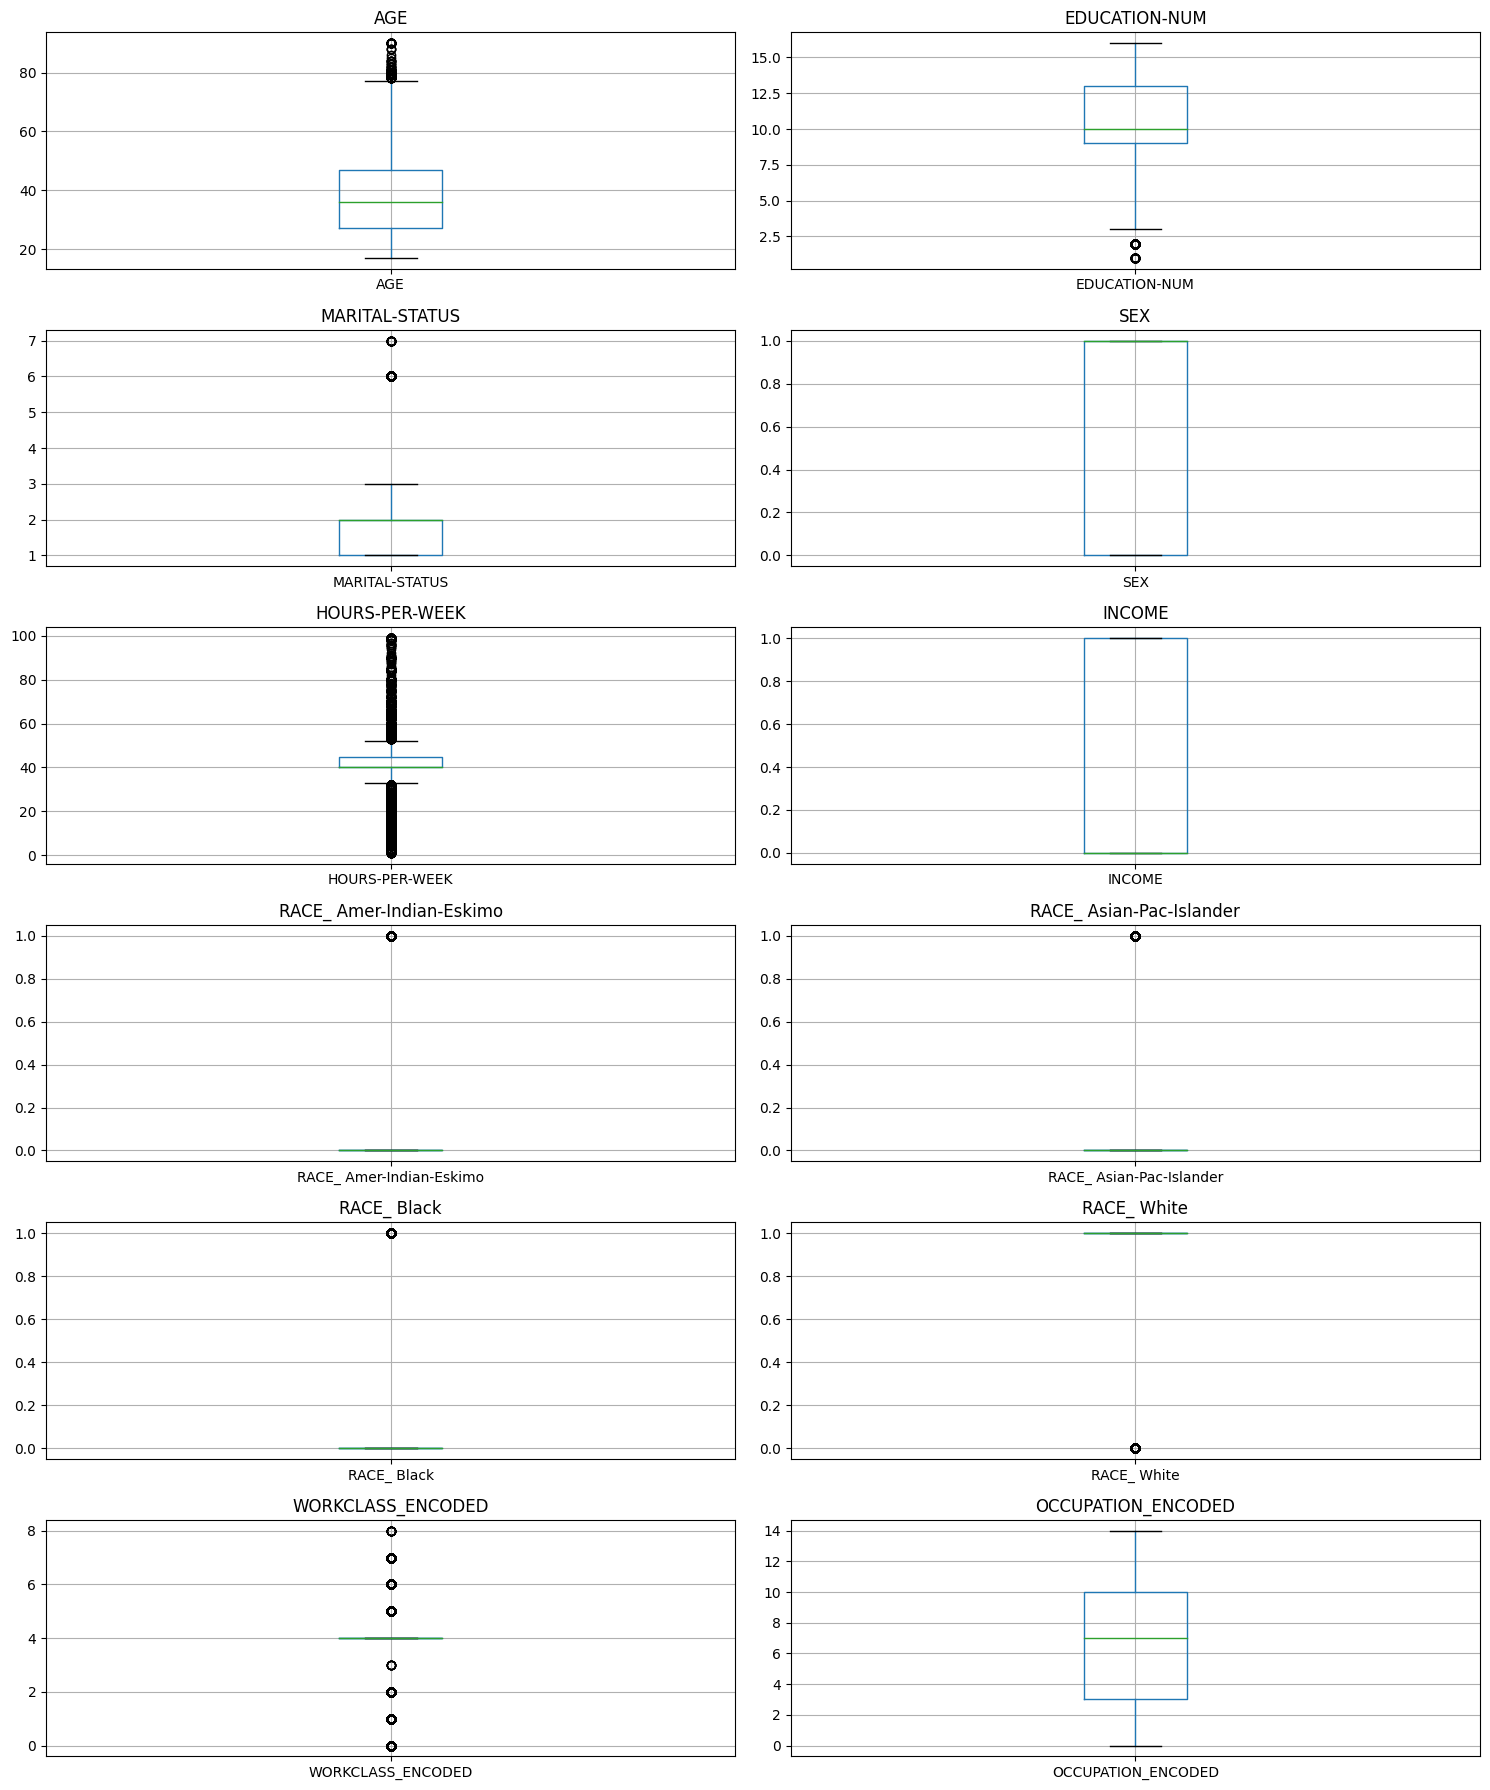

In [54]:
import pandas as pd
import matplotlib.pyplot as plt


num_cols = df.select_dtypes(include='number').columns


n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols

# Creo los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))


axes = axes.flatten()

# Itero cada columnda y creo un boxplot por cada una
for i, col in enumerate(num_cols):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Ajusto los graficos para prevenir overlapping
plt.tight_layout()


plt.show()


**Me focalizo en aquellas variables que tienen menos outliers**

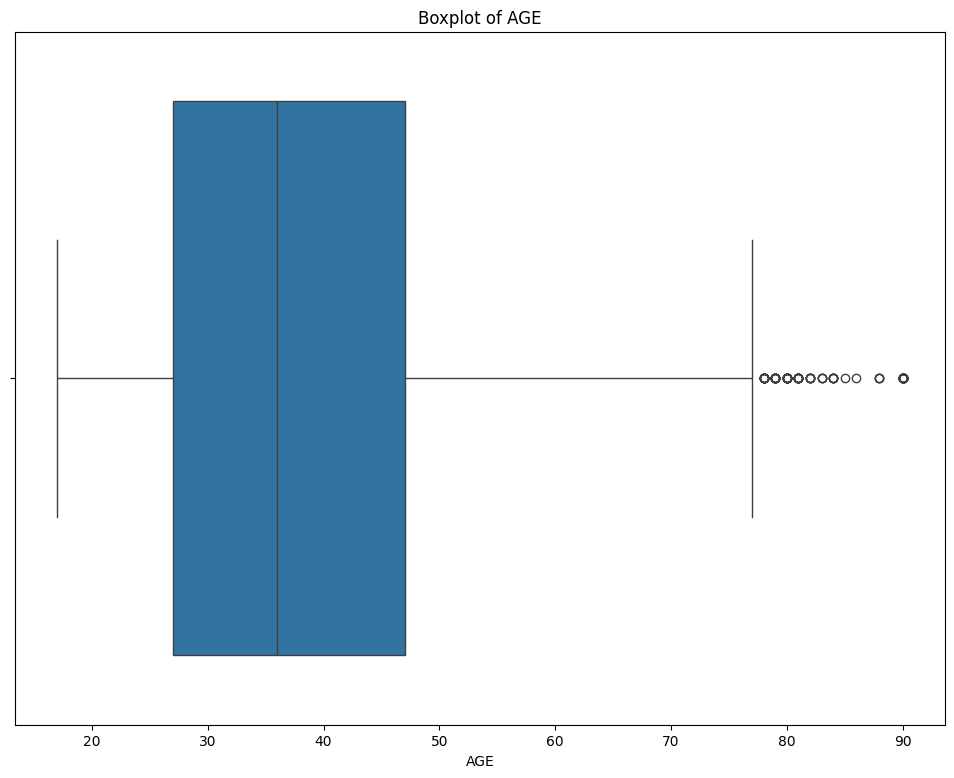

In [55]:
sns.boxplot(x=df['AGE'])
plt.title('Boxplot of AGE')
plt.show()

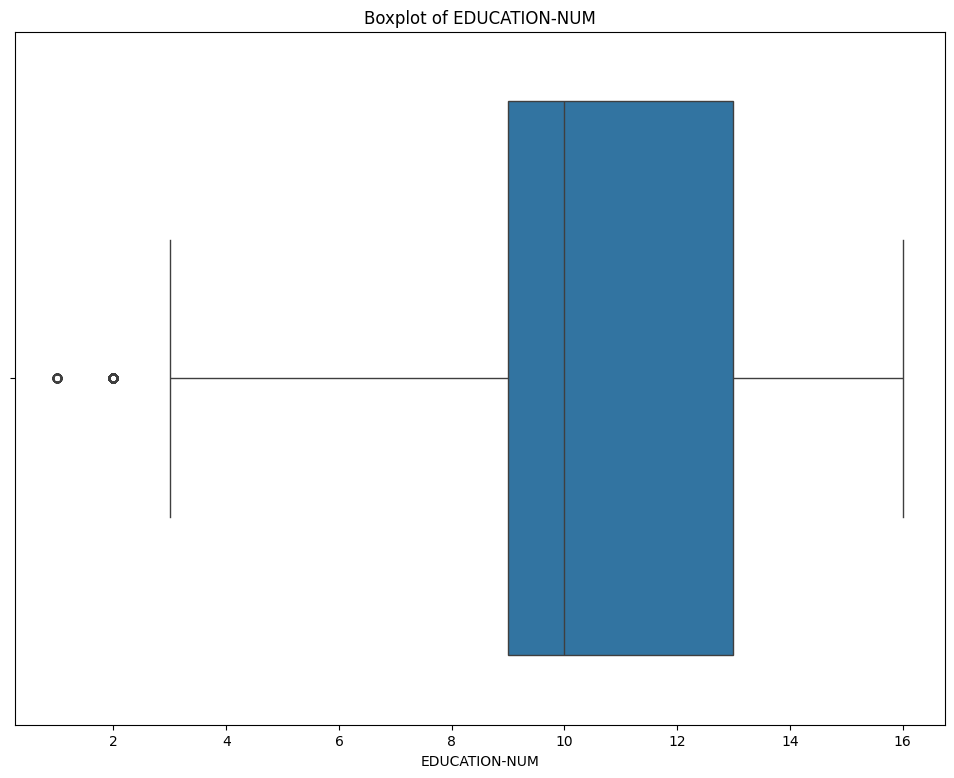

In [56]:
sns.boxplot(x=df['EDUCATION-NUM'])
plt.title('Boxplot of EDUCATION-NUM')
plt.show()

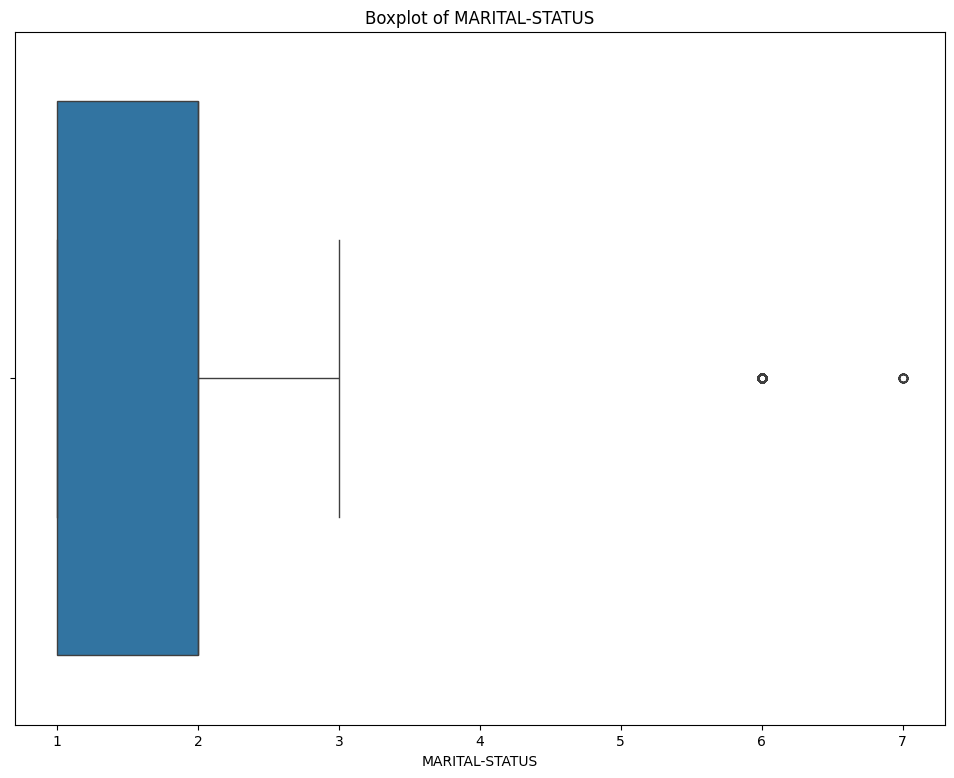

In [57]:
sns.boxplot(x=df['MARITAL-STATUS'])
plt.title('Boxplot of MARITAL-STATUS')
plt.show()

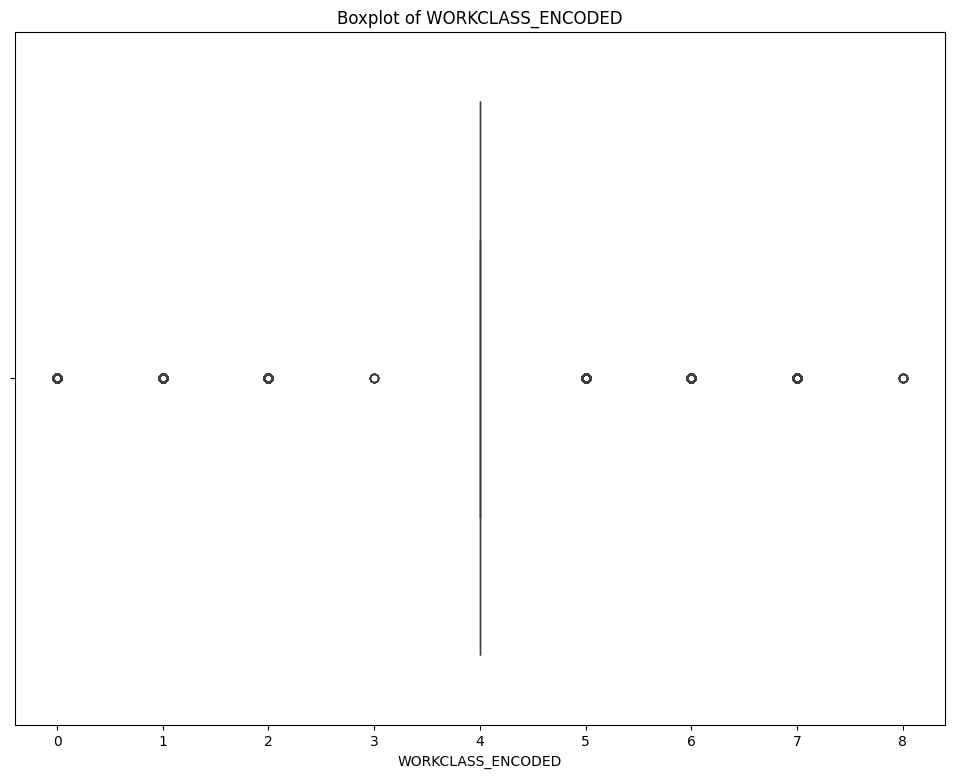

In [58]:
sns.boxplot(x=df['WORKCLASS_ENCODED'])
plt.title('Boxplot of WORKCLASS_ENCODED')
plt.show()

Creo una funcion que me elimina los outliers usando el concepto de rango intercuartil

In [59]:


def remove_outliers(df, columns, threshold=1.5):
  df_no_outliers = df.copy()

  for col in columns:
        # Calculo el IQR para cada columna
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Defino los limites para identificar ouliers
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Elimino outliers
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]

  return df_no_outliers



Le paso las columnas que visualize antes que poseian pocos valores atipicos a la funcion que los elimina.

In [60]:

columns_to_remove_outliers = ['AGE', 'EDUCATION-NUM', 'MARITAL-STATUS',"WORKCLASS_ENCODED"]
df_cleaned = remove_outliers(df, columns_to_remove_outliers)
df=df_cleaned

# DATAFRAME LISTO

Como se ve todas las variables quedaron numericas. Un dataframe con todas las variables numéricas simplifica el procesamiento y análisis de datos, permitiendo una mayor eficiencia computacional y compatibilidad con modelos matemáticos. Además, la interpretación de relaciones entre variables se vuelve más clara, reduciendo la complejidad del modelo.

En comparacion al DataFrame original perdimos 3 columnas, y 11714 individuos. Aunque hayamos perdido casi un tercio del data set, tenemos buena informacion. La mayoria de filas que se perdieron fue debido a la quita de datos outliers que iban a entorpecer las conclusiones.

In [61]:
df

,AGE,EDUCATION-NUM,MARITAL-STATUS,SEX,HOURS-PER-WEEK,INCOME,RACE_ Amer-Indian-Eskimo,RACE_ Asian-Pac-Islander,RACE_ Black,RACE_ White,WORKCLASS_ENCODED,OCCUPATION_ENCODED
2,38,9,3.0,1,40,0,0,0,0,1,4,6
3,53,7,1.0,1,40,0,0,0,1,0,4,6
4,28,13,1.0,0,40,0,0,0,1,0,4,10
5,37,14,1.0,0,40,0,0,0,0,1,4,4
8,31,14,2.0,0,50,1,0,0,0,1,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,14,1.0,1,40,1,0,0,0,1,4,4
32555,22,10,2.0,1,40,0,0,0,0,1,4,11
32556,27,12,1.0,0,38,0,0,0,0,1,4,13
32557,40,9,1.0,1,40,1,0,0,0,1,4,7


Tabla de correlaciones con el INCOME. Recordemos que esto no quiere decir causalidad. Solo que hay relacion del tipo lineal, si aumenta o disminuye el target cuanto aumentan las otras. En este caso seria, si ganamos 50 k cuanto varian las variables en comparacion de si ganaramos menos de 50k. A simple vista no podemos observar relaciones muy fuertes

<Axes: >

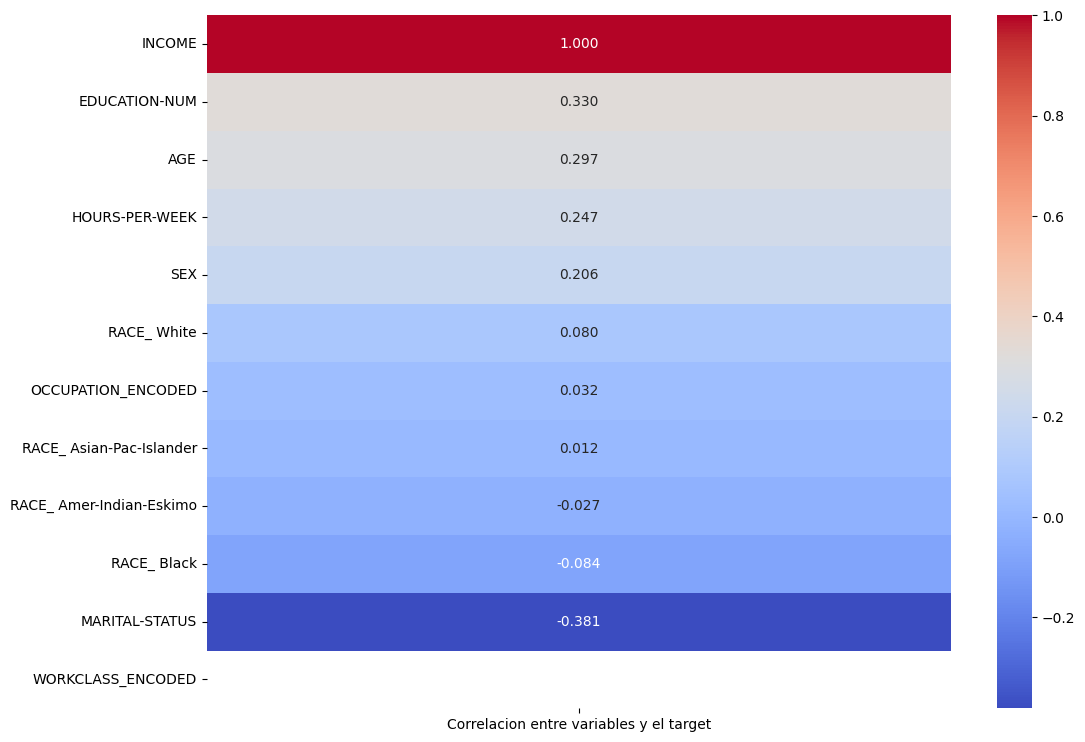

In [62]:
target="INCOME"
correlacion=df.corrwith(df[target])
df_correlacion=pd.DataFrame(correlacion.sort_values(ascending=False),columns=["Correlacion entre variables y el target"])
sns.heatmap(df_correlacion,annot=True,cmap='coolwarm',fmt=".3f")

# MODELADO

Definimos el target

In [63]:
target="INCOME"

Elijo mis variables x con las que intentare predecir el target

## Definicion de X e Y, Split

In [64]:
X=df.drop([target],axis=1)
y=df[target]

In [65]:
#Hago el split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

Hacemos el Split, dividiendo a los datos en entrenamiento y de prueba.Este proceso es crucial para evaluar el rendimiento del modelo en datos no vistos y evitar problemas de sobreajuste. El conjunto de entrenamiento se utiliza para ajustar el modelo, y el conjunto de prueba se utiliza para evaluar su rendimiento en datos no utilizados durante el entrenamiento.

## Seleccion del mejor modelo

Recordemos nuestro objetivo, generar un modelo que nos permita clasificar si ganan mas o menos de 50000 dolares. Entonces usaremos modelos que nos permitan clasificar

Este bloque de código realiza una búsqueda de hiperparámetros utilizando la técnica de validación cruzada en conjuntos de entrenamiento para varios modelos de clasificación. Primero, importa las bibliotecas necesarias y define los modelos junto con los rangos de hiperparámetros que se probarán. Luego, configura un objeto KFold para la validación cruzada y realiza el proceso de búsqueda de hiperparámetros y evaluación de rendimiento para cada modelo mediante GridSearch. La salida proporciona la mejor configuración encontrada para cada modelo y su puntuación de validación cruzada, lo que permite seleccionar el modelo óptimo para la tarea de clasificación.

Detalle de algunos terminos importantes:

Validación Cruzada (Cross-Validation): La validación cruzada es una estrategia para evaluar el rendimiento de un modelo en datos que no ha visto durante el entrenamiento. En este caso, se utiliza la validación cruzada de tipo K-Fold. El conjunto de datos se divide en K partes (llamadas pliegues), y el modelo se entrena y evalúa K veces, utilizando diferentes pliegues como conjuntos de prueba en cada iteración. Esto proporciona una evaluación más robusta del rendimiento del modelo y ayuda a evitar problemas como el sobreajuste o infraajuste.








In [ ]:
# Importo las bibliotecas necesarias
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Defino los modelos a probar y los rangos de hiperparámetros

models = {
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'LogisticRegression': (LogisticRegression(solver='lbfgs', max_iter=1000), {'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}),
    'NaiveBayes': (GaussianNB(), {}),
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]})
}

# Configuramos el objeto KFold para cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizamos el grid search y la evaluación de rendimiento para cada modelo
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Mejor configuración para {model_name}: {grid_search.best_params_}")

    # Se evalúa el rendimiento con cross-validation
    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='accuracy')
    print(f"Puntuación de validación cruzada para {model_name}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})\n")



Mejor configuración para RandomForest: {'max_depth': 10, 'n_estimators': 50}
Puntuación de validación cruzada para RandomForest: 0.8407 (±0.0013)

Mejor configuración para GradientBoosting: {'learning_rate': 0.1, 'n_estimators': 200}
Puntuación de validación cruzada para GradientBoosting: 0.8457 (±0.0028)

Mejor configuración para LogisticRegression: {'C': 1}
Puntuación de validación cruzada para LogisticRegression: 0.8288 (±0.0033)

Mejor configuración para KNN: {'n_neighbors': 7}
Puntuación de validación cruzada para KNN: 0.8132 (±0.0051)

Mejor configuración para DecisionTree: {'max_depth': 10, 'min_samples_split': 10}
Puntuación de validación cruzada para DecisionTree: 0.8292 (±0.0041)

Mejor configuración para NaiveBayes: {}
Puntuación de validación cruzada para NaiveBayes: 0.7638 (±0.0104)

Mejor configuración para AdaBoost: {'learning_rate': 0.2, 'n_estimators': 200}
Puntuación de validación cruzada para AdaBoost: 0.8413 (±0.0035)



## Modelo Ganador




*   **Mejor configuración para GradientBoosting: {'learning_rate': 0.1,'n_estimators': 200}**
*   **Puntuación de validación cruzada para GradientBoosting: 0.8457 (±0.0028)**





In [ ]:
modelo_ganador = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)


El algoritmo de Gradient Boosting es una técnica de ensamblado que construye un modelo predictivo fuerte combinando la potencia de múltiples modelos más débiles llamados "árboles de decisión débiles". Un árbol de decisión es un modelo predictivo que organiza decisiones y resultados en una estructura similar a un árbol. Cada nodo del árbol representa una pregunta sobre las características de los datos, y las ramas conducen a decisiones o predicciones finales.
[Imagen de un arbol de decision](https://miro.medium.com/v2/resize:fit:1007/1*dNzke0_528zR8nyz0EYJ0Q.png)

Bueno Gradient Boosting usa este modelo por debajo pero lo mejora(notese el accuracy del DecisionTreeClassifier arriba).

Ahora como lo hace...? Sin palabras dificiles:

Piensa en Gradient Boosting como un amigo que te ayuda a mejorar cada vez que te caes. Aquí está cómo funciona:



1.   Primer Intento (Primer Árbol): Cuando intentas andar en bicicleta por primera vez, puede que no vayas muy lejos y te caigas un poquito. El primer intento es como nuestro primer árbol. No es perfecto, pero hace algo.

2.   Descubrimos Errores (Residuos): Después de cada intento, miramos lo que hiciste y notamos dónde te caíste o cometiste errores. Esos errores son como las cosas que nuestro primer intento (árbol) no hizo muy bien.

3.   Intento Mejorado (Nuevo Árbol): Ahora, imaginemos que alguien te da algunos consejos sobre cómo mejorar en andar en bicicleta. Eso es lo que hace Gradient Boosting. Crea otro intento (nuevo árbol) específicamente diseñado para corregir los errores que cometiste.

4.   Aprendemos de Nuestros Errores (Pesos): Cada vez que cometes un error, aprendemos algo. Gradient Boosting toma esos errores en cuenta y ajusta el próximo intento para hacerlo mejor. Algunos errores son más importantes que otros, por lo que damos más peso a los errores más grandes.

5.   Sumamos Todo (Predicción Final): Después de muchos intentos (árboles), miramos todas las cosas que aprendimos y las sumamos para obtener una forma mucho mejor de andar en bicicleta. Cada nuevo intento ayuda a corregir los errores anteriores.

6.   Practicamos (Iteración): Hacemos esto una y otra vez, mejorando cada vez. Cuantos más intentos tengamos, mejor será nuestra habilidad para andar en bicicleta. Gradient Boosting hace lo mismo: mejora gradualmente para hacer predicciones más precisas.


**En resumen, Gradient Boosting es como aprender a andar en bicicleta con la ayuda de un amigo inteligente que te guía para mejorar cada vez más. Así es como hace predicciones más precisas!**

**learning_rate:** Este parámetro controla la contribución de cada árbol al modelo general. Un valor más bajo significa que cada árbol contribuye menos, lo que generalmente requiere más árboles para lograr el mismo nivel de ajuste al conjunto de datos.

**n_estimators:** Representa el número total de árboles que se van a construir en el proceso de Gradient Boosting. Cada árbol se construye de manera secuencial, y el modelo general mejora a medida que se agregan más árboles.

## Disminucion de variables

Ya con el modelo ganador, queremos ver si existe la posibilidad de achicar la cantidad de variables. Esto no solo agiliza la necesidad de computo, sino que es mejor tener un modelo sencillo  en terminos de practicidad. Necesitamos menos datos para predecir. Para esto usaremos SequentialFeatureSelector. El siguiente bloque veremos la mejor combinacion posible de variables de un rango de 1 a 10.


Sequential Feature Selector (SFS) es una técnica que explora de manera secuencial diferentes combinaciones de variables en un conjunto de datos. Comienza sin variables y añade gradualmente las más relevantes, evaluando cómo cada adición afecta al rendimiento del modelo.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Definimos el modelo a usar
modelo_ganador = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)

# Definimos el Sequential Feature Selector
sfs = SFS(modelo_ganador, k_features=(1, 10), forward=True, scoring='accuracy', cv=kf)

# Ajustamos a los datos de entrenamiento
sfs.fit(X_train, y_train)

# Devuelve el mejor subset de variables
for k_features in range(1, 11):
    feature_names = sfs.subsets_[k_features]['feature_names']
    print(f"Best {k_features} features: {feature_names}")

Best 1 features: ('EDUCATION-NUM',)
Best 2 features: ('EDUCATION-NUM', 'MARITAL-STATUS')
Best 3 features: ('EDUCATION-NUM', 'MARITAL-STATUS', 'OCCUPATION_ENCODED')
Best 4 features: ('AGE', 'EDUCATION-NUM', 'MARITAL-STATUS', 'OCCUPATION_ENCODED')
Best 5 features: ('AGE', 'EDUCATION-NUM', 'MARITAL-STATUS', 'HOURS-PER-WEEK', 'OCCUPATION_ENCODED')
Best 6 features: ('AGE', 'EDUCATION-NUM', 'MARITAL-STATUS', 'HOURS-PER-WEEK', 'RACE_ Amer-Indian-Eskimo', 'OCCUPATION_ENCODED')
Best 7 features: ('AGE', 'EDUCATION-NUM', 'MARITAL-STATUS', 'HOURS-PER-WEEK', 'RACE_ Amer-Indian-Eskimo', 'WORKCLASS_ENCODED', 'OCCUPATION_ENCODED')
Best 8 features: ('AGE', 'EDUCATION-NUM', 'MARITAL-STATUS', 'SEX', 'HOURS-PER-WEEK', 'RACE_ Amer-Indian-Eskimo', 'WORKCLASS_ENCODED', 'OCCUPATION_ENCODED')
Best 9 features: ('AGE', 'EDUCATION-NUM', 'MARITAL-STATUS', 'SEX', 'HOURS-PER-WEEK', 'RACE_ Amer-Indian-Eskimo', 'RACE_ Black', 'WORKCLASS_ENCODED', 'OCCUPATION_ENCODED')
Best 10 features: ('AGE', 'EDUCATION-NUM', 'MARITA

Creo una funcion que me devuelve el mejor conjunto de variables, y su rendimiento. Con esto evaluamos cual es el numero que utilizaremos para nuestro modelo final

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

# Configuramos el objeto KFold para cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def get_accuracy_for_feature_subset(features, X, y):
    model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)
    X_subset = X[features]

    # Use la validacion cruzada para calcular el accuracy
    accuracy_scores = cross_val_score(model, X_subset, y, scoring='accuracy', cv=kf)

    # Me devuelve el accuracy
    return accuracy_scores.mean()

# Defino los mejores subsets
best_feature_subsets = {
1: ["EDUCATION-NUM"],
2: ["EDUCATION-NUM", "MARITAL-STATUS"],
3: ["EDUCATION-NUM", "MARITAL-STATUS", "OCCUPATION_ENCODED"],
4: ["AGE", "EDUCATION-NUM", "MARITAL-STATUS", "OCCUPATION_ENCODED"],
5: ["AGE", "EDUCATION-NUM", "MARITAL-STATUS", "HOURS-PER-WEEK", "OCCUPATION_ENCODED"],
6: ["AGE", "EDUCATION-NUM", "MARITAL-STATUS", "HOURS-PER-WEEK", "RACE_ Amer-Indian-Eskimo", "OCCUPATION_ENCODED"],
7: ["AGE", "EDUCATION-NUM", "MARITAL-STATUS", "HOURS-PER-WEEK", "RACE_ Amer-Indian-Eskimo", "WORKCLASS_ENCODED", "OCCUPATION_ENCODED"],
8: ["AGE", "EDUCATION-NUM", "MARITAL-STATUS", "SEX", "HOURS-PER-WEEK", "RACE_ Amer-Indian-Eskimo", "WORKCLASS_ENCODED", "OCCUPATION_ENCODED"],
9: ["AGE", "EDUCATION-NUM", "MARITAL-STATUS", "SEX", "HOURS-PER-WEEK", "RACE_ Amer-Indian-Eskimo", "RACE_ Black", "WORKCLASS_ENCODED", "OCCUPATION_ENCODED"],
10: ["AGE", "EDUCATION-NUM", "MARITAL-STATUS", "SEX", "HOURS-PER-WEEK", "RACE_ Amer-Indian-Eskimo", "RACE_ Black", "RACE_ White", "WORKCLASS_ENCODED", "OCCUPATION_ENCODED"]
}

# Calculo e imprimo el accuracy para cada subset
for k_features, feature_subset in best_feature_subsets.items():
    accuracy = get_accuracy_for_feature_subset(feature_subset, X_train, y_train)
    print(f"Accuracy using {k_features} features: {accuracy:.4f}")

Accuracy using 1 features: 0.7838
Accuracy using 2 features: 0.8271
Accuracy using 3 features: 0.8354
Accuracy using 4 features: 0.8435
Accuracy using 5 features: 0.8442
Accuracy using 6 features: 0.8448
Accuracy using 7 features: 0.8448
Accuracy using 8 features: 0.8461
Accuracy using 9 features: 0.8461
Accuracy using 10 features: 0.8453


Quedandonos con 5 variables tenemos el mejor rendimiento practicamente. Podemos usar menos variables y obtener el mismo rendimiento. La utilidad de esto es genial. Imaginemos en un futuro, un nuevo censo, con menores datos de cada individuo podemos predecir lo mismo.

## DATAFRAME Final

In [66]:
df_final = df[['AGE', 'EDUCATION-NUM', 'MARITAL-STATUS', 'HOURS-PER-WEEK', 'OCCUPATION_ENCODED', 'INCOME']]
df_final

,AGE,EDUCATION-NUM,MARITAL-STATUS,HOURS-PER-WEEK,OCCUPATION_ENCODED,INCOME
2,38,9,3.0,40,6,0
3,53,7,1.0,40,6,0
4,28,13,1.0,40,10,0
5,37,14,1.0,40,4,0
8,31,14,2.0,50,10,1
...,...,...,...,...,...,...
32554,53,14,1.0,40,4,1
32555,22,10,2.0,40,11,0
32556,27,12,1.0,38,13,0
32557,40,9,1.0,40,7,1


**Asignaciones de Workclass:**

 Federal-gov -> 1
 Local-gov -> 2
 Never-worked -> 3
 Private -> 4
 Self-emp-inc -> 5
 Self-emp-not-inc -> 6
 State-gov -> 7
 Without-pay -> 8

**Asignaciones de Occupation:**

 Adm-clerical -> 1
 Armed-Forces -> 2
 Craft-repair -> 3
 Exec-managerial -> 4
 Farming-fishing -> 5
 Handlers-cleaners -> 6
 Machine-op-inspct -> 7
 Other-service -> 8
 Priv-house-serv -> 9
 Prof-specialty -> 10
 Protective-serv -> 11
 Sales -> 12
 Tech-support -> 13
 Transport-moving -> 14

**Asignaciones de Marital Status:**

 'Married-civ-spouse': 1, 'Never-married': 2, 'Divorced': 3,'Separated ': 4, 'Widowed ': 5, 'Married-spouse-absent': 6,"Married-AF-spouse":7

## Modelo final y accuracy con el test

In [67]:
#Hago el split
from sklearn.model_selection import train_test_split
Xf=df_final.drop([target],axis=1)
y=df[target]
Xf_train,Xf_test,y_train,y_test = train_test_split(Xf,y)



In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
modelo_ganador = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2)
modelo_ganador.fit(Xf_train, y_train)
from sklearn.metrics import accuracy_score

# Suponiendo que ya tienes tu modelo_ganador entrenado y tus datos de prueba (X_test, y_test)
y_pred = modelo_ganador.predict(Xf_test)

# Calcular la precisiónf
accuracy = accuracy_score(y_test, y_pred)

In [69]:
accuracy

0.8478511128165771

Evaluo el rendimiento del modelo con el accuracy score. Metrica que representa la proporción de predicciones correctas en relación con el total de predicciones realizadas por el modelo.

Pequeño dataframe para tener mejor nocion de lo que significa esa metrica

In [70]:
df_results = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred})
df_results.sample(20)

,True Labels,Predicted Labels
27246,0,0
3365,1,1
2987,0,0
31909,0,0
18275,1,1
26671,0,0
20601,0,1
12567,1,0
24321,1,0
7701,1,1


## Matriz de confusion

Realizo una matriz de confusion. Me permite identificar dónde y cómo el modelo comete errores. Seria otra forma de evaluar el rendimiento.

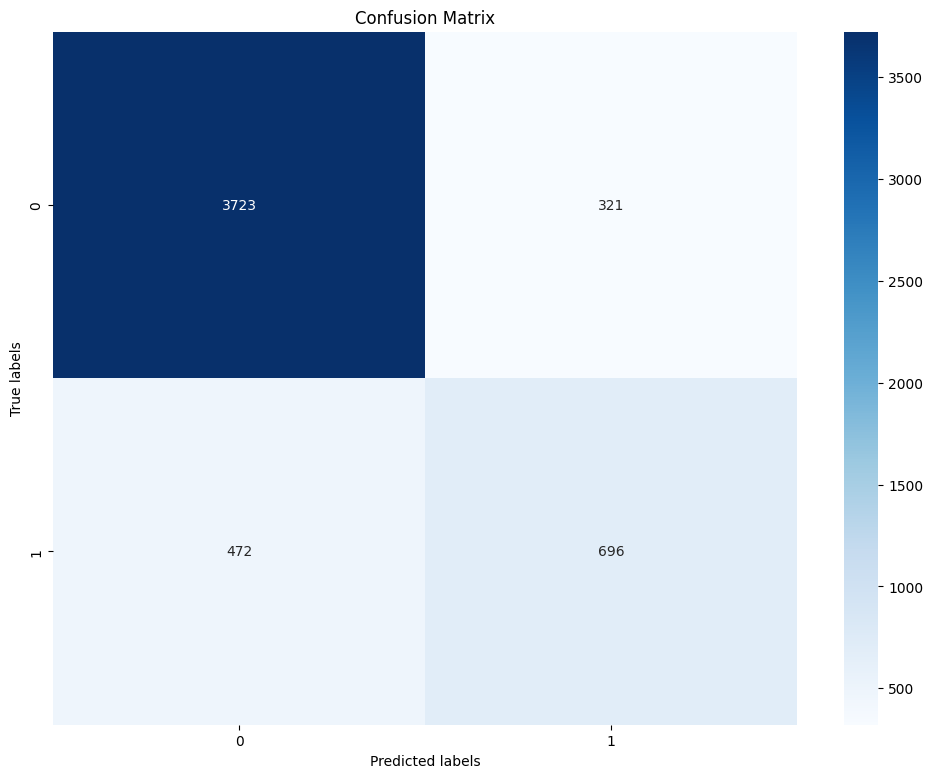

In [73]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


A simple vista vemos que el modelo no esta nada mal, tuvo mayores aciertos que desaciertos.

La peor prediccion fue el falso negativo, es decir gente que ganaba mas de 50k el modelo "dijo" que ganaba menos.
Esto habla de la dificultad y no mucha linealidad para predecir aquellos individuos de mayores ingresos.

# CONCLUSION - INSIGHTS


## Divido el DF en dos

Empecemos haciendo dos dataframes, uno para aquellos que ganan mas de 50k y otro para los que no.

In [ ]:
# Crear dos DataFrames separados
df_income_1 = df_final[df_final['INCOME'] == 1]
df_income_0 = df_final[df_final['INCOME'] == 0]

print(df_income_1.head(15).to_string(index=True))
print("\n")
print(df_income_0.head(15).to_string(index=True))

     AGE  EDUCATION-NUM  MARITAL-STATUS  HOURS-PER-WEEK  OCCUPATION_ENCODED  INCOME
8     31             14             2.0              50                  10       1
9     42             13             1.0              40                   4       1
10    37             10             1.0              80                   4       1
14    40             11             1.0              40                   3       1
20    40             16             1.0              60                  10       1
38    31             10             1.0              38                  12       1
52    47             15             1.0              60                  10       1
55    43             10             1.0              40                  13       1
63    42             16             1.0              45                  10       1
67    53              9             1.0              40                   1       1
84    44              9             3.0              40                   3 

Recordemos los valores de Occupation y Marital Status

**Asignaciones de Occupation:**

 Adm-clerical -> 1
 Armed-Forces -> 2
 Craft-repair -> 3
 Exec-managerial -> 4
 Farming-fishing -> 5
 Handlers-cleaners -> 6
 Machine-op-inspct -> 7
 Other-service -> 8
 Priv-house-serv -> 9
 Prof-specialty -> 10
 Protective-serv -> 11
 Sales -> 12
 Tech-support -> 13
 Transport-moving -> 14

**Asignaciones de Marital Status:**

 'Married-civ-spouse': 1, 'Never-married': 2, 'Divorced': 3,'Separated ': 4, 'Widowed ': 5, 'Married-spouse-absent': 6,"Married-AF-spouse":7

A simple vista podemos ver una clara tendencia a favor de estar casado en aquellos que ganan mas de 50k, numeros mas altos en educacion y algo mas de hs trabajadas.Veamoslo con mas detalle.

In [ ]:
# Mostrar información útil sobre el DataFrame con INCOME igual a 1
print("Información para personas con INCOME = 1:")
print(df_income_1.describe().loc[['mean', 'std','50%','count']].to_string(index=True))

# Mostrar información útil sobre el DataFrame con INCOME igual a 0
print("\nInformación para personas con INCOME = 0:")
print(df_income_0.describe().loc[['mean', 'std','50%','count']].to_string(index=True))

Información para personas con INCOME = 1:
               AGE  EDUCATION-NUM  MARITAL-STATUS  HOURS-PER-WEEK  OCCUPATION_ENCODED  INCOME
mean     42.612963      11.434044        1.189894       45.528474            7.188859     1.0
std       9.668186       2.266166        0.525424        9.915335            4.068433     0.0
50%      42.000000      12.000000        1.000000       42.000000            7.000000     1.0
count  4829.000000    4829.000000     4829.000000     4829.000000         4829.000000  4829.0

Información para personas con INCOME = 0:
                AGE  EDUCATION-NUM  MARITAL-STATUS  HOURS-PER-WEEK  OCCUPATION_ENCODED   INCOME
mean      34.001436       9.574666        1.837558       38.987202            6.882382      0.0
std       12.243107       2.238136        0.698080       11.108220            4.048794      0.0
50%       31.000000       9.000000        2.000000       40.000000            7.000000      0.0
count  16018.000000   16018.000000    16018.000000    16018.0

## Conclusiones

*   El promedio de Edad, Educacion, y Horas Trabajadas es mayor en los que ganan mas de 50k

*   El promedio de Estado Civil es menor en los que ganan mas de 50k, esto es lo que vimos en el grafico anterior, la clara tendencia en estar casado para los pertenecientes a este grupo.

*   No hay diferencias significativas en el promedio de la ocupacion, teniendo casi el mismo desvio, y si se observva la mediana el numero 4 divide a la muestra en dos en ambos subgraficos. Por lo que la ocupacion pareciera ser el factor menos relevante.






Los siguientes graficos son hechos para la utilizacion en la presentacion pptx.

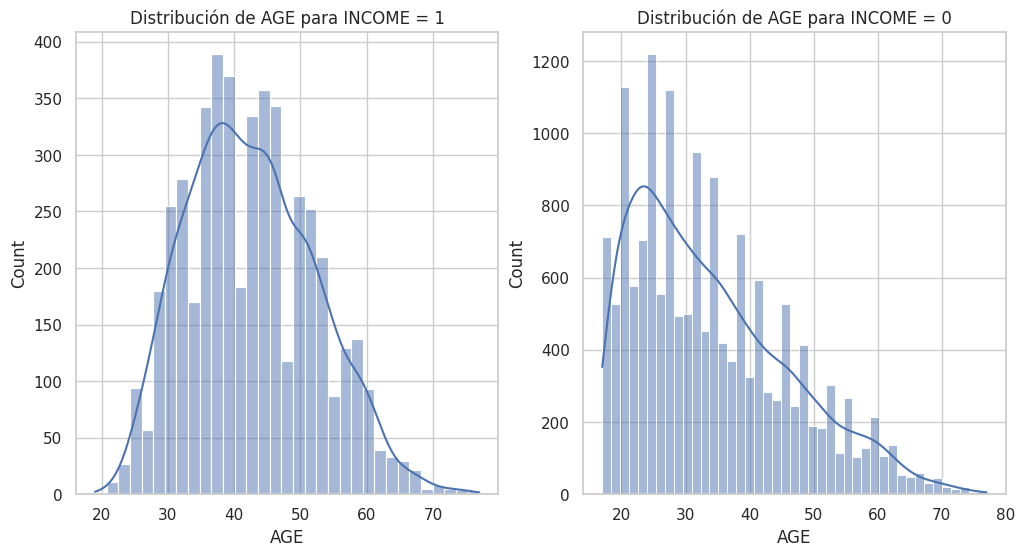

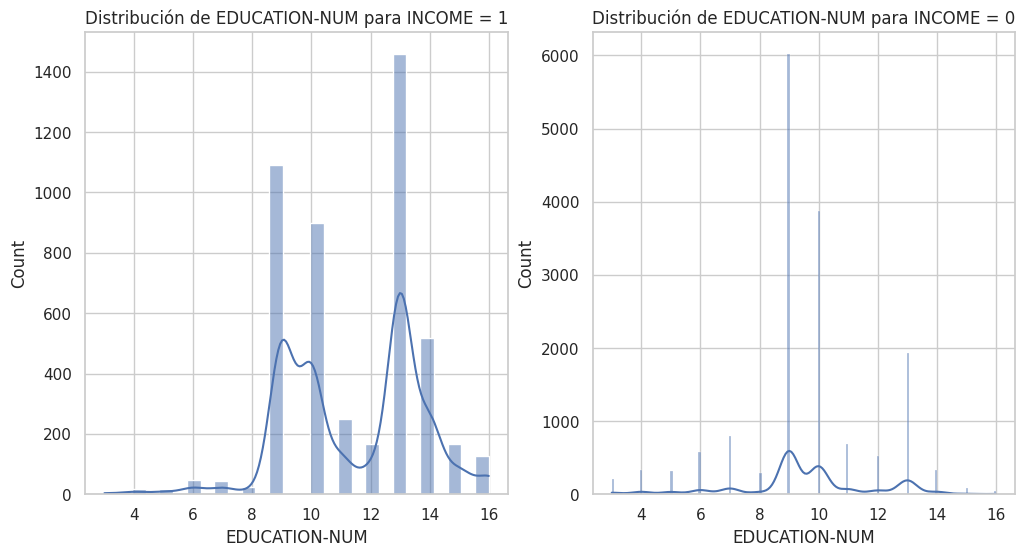

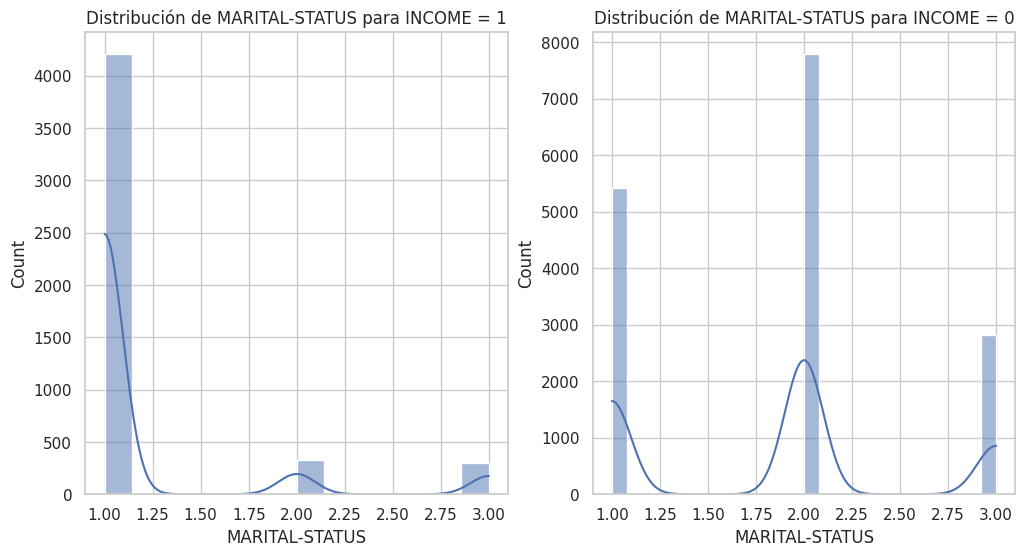

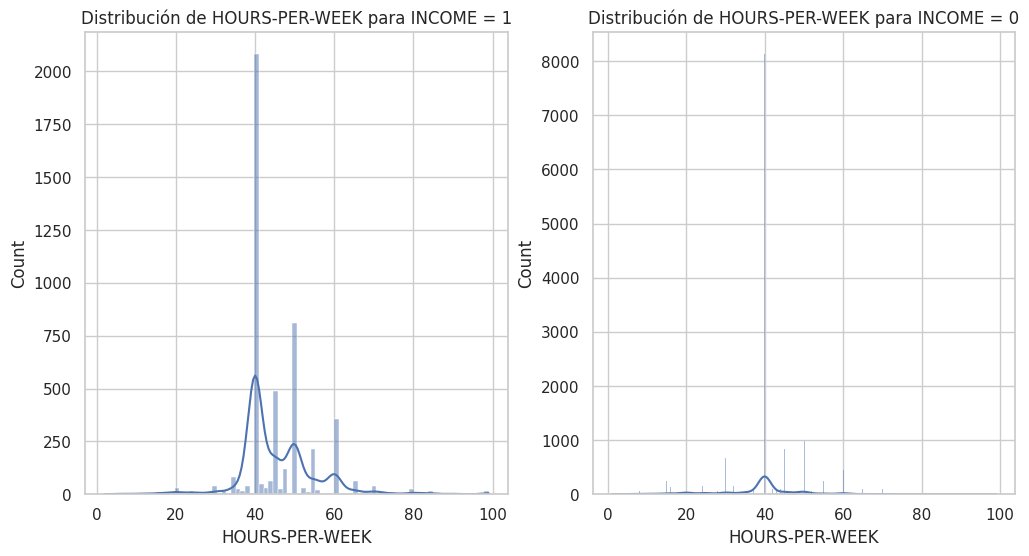

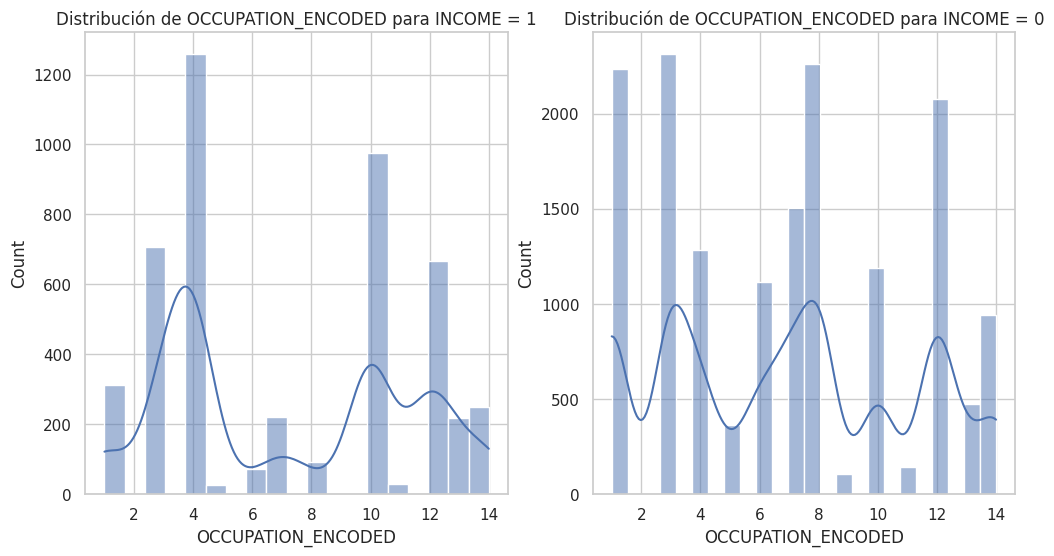

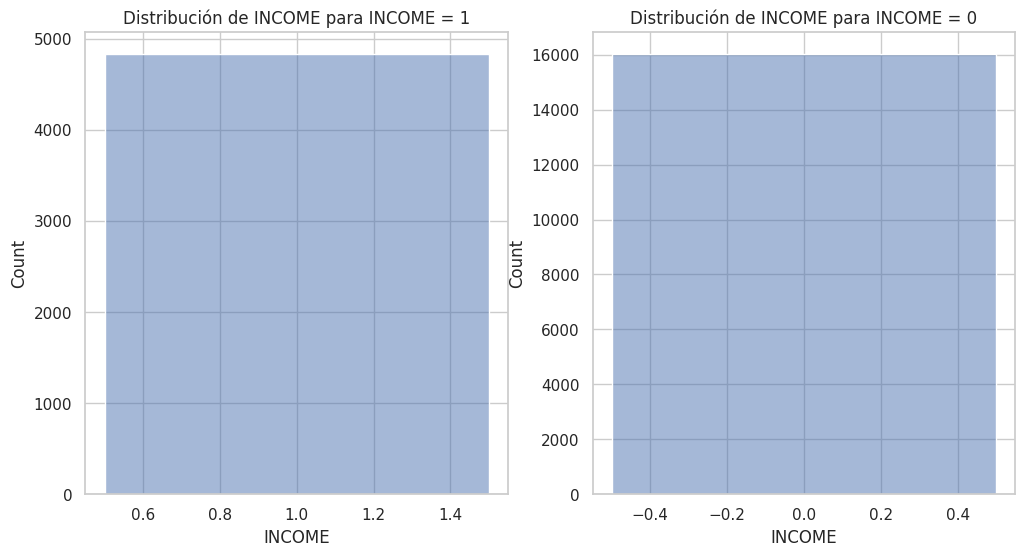

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de los gráficos
sns.set(style="whitegrid")

# Analizo univariadamente y comparar variables
for column in df_income_1.columns:
    # Grafico df_income_1
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df_income_1[column], kde=True)
    plt.title(f'Distribución de {column} para INCOME = 1')

    # Grafico df_income_0
    plt.subplot(1, 2, 2)
    sns.histplot(df_income_0[column], kde=True)
    plt.title(f'Distribución de {column} para INCOME = 0')


    plt.show()

## Importancia de las variables

Gradient Boosting nos muestra las variables mas importantes. La importancia se calcula observando cómo cada característica contribuye a la reducción de la función de pérdida. EL orden del array es de las columnas en el dataframe final.

In [ ]:
# Obtengo la importancia de las variables
importancias_variables = modelo_ganador.feature_importances_
importancias_variables

array([0.11360694, 0.27955154, 0.47898747, 0.07490041, 0.05295363])

In [ ]:
# Nombres de las variables correspondientes
nombres_variables = Xf_train.columns

# Creo un DataFrame para visualizar la importancia de las variables
importancias_df = pd.DataFrame({'Variable': nombres_variables, 'Importancia': importancias_variables})

# Ordeno el DataFrame por importancia en orden descendente
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)


print(importancias_df)

             Variable  Importancia
2      MARITAL-STATUS     0.478987
1       EDUCATION-NUM     0.279552
0                 AGE     0.113607
3      HOURS-PER-WEEK     0.074900
4  OCCUPATION_ENCODED     0.052954


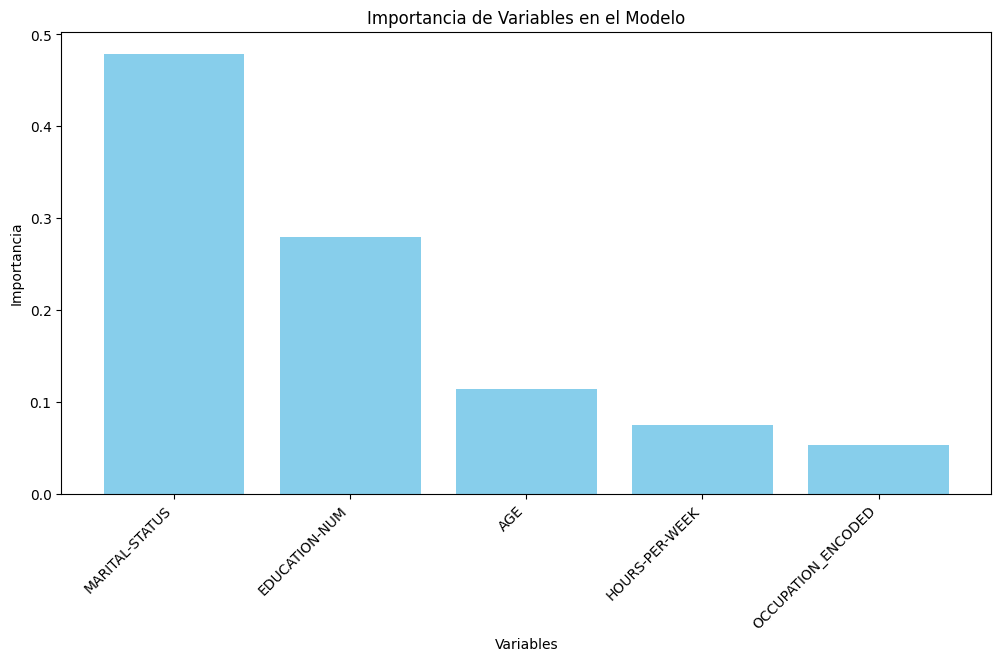

In [ ]:
# Graficamente con un grafico de barras
plt.figure(figsize=(12, 6))
plt.bar(importancias_df['Variable'], importancias_df['Importancia'], color='skyblue')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de Variables en el Modelo')
plt.xticks(rotation=45, ha='right')
plt.show()

Las importancias van muy de la mano con las conclusiones del anterior describe.

## INSIGHTS - SUBJETIVOS

 **MARITAL-STATUS**

Para empezar no podemos estar seguro que contraer matrimonio trae mayores ingresos o que por tener mayores ingresos puedas estar casado. Pero los datos muestran que la tendencia a ganar mas esta a favor de aquellas personas casadas. Entre algunas razones para ganar mas de 50k:

1.   División de gastos: En un matrimonio, los gastos pueden dividirse entre dos personas, lo que puede resultar en una mayor capacidad para afrontar costos como vivienda, servicios públicos y otros gastos comunes.

2.  Acceso a redes sociales y profesionales: El matrimonio puede proporcionar acceso a redes sociales y profesionales más amplias, lo que podría influir positivamente en las oportunidades laborales y los ingresos.

3.   Estabilidad emocional: La estabilidad emocional que a menudo se asocia con el matrimonio puede tener efectos positivos en el rendimiento laboral y, en última instancia, en los ingresos.












**EDUCATION-NUM**

La educación influye en los ingresos principalmente debido a la adquisición de habilidades y conocimientos especializados que hacen que las personas sean más atractivas para empleos mejor remunerados.

Niveles más altos de educación por lo tanto facilitan el acceso a oportunidades laborales, el desarrollo profesional continuo y la construcción de redes en el ámbito laboral.

Quizas era uno de los puntos mas obvios, pero aun asi no fue el mas importante.

**AGE**

La asociación entre la edad y mayores ingresos puede explicarse por la acumulación de experiencia laboral y habilidades a lo largo del tiempo. A medida que las personas envejecen, tienden a avanzar en sus carreras, asumiendo roles de mayor responsabilidad y especialización, lo que se refleja en salarios más altos.

Esta variable va muy de la mano con las anteriores. A mayor edad mas chances de haber estudiado mas, de haber tenido mas experiencia y ademas de haber entrado en una relacion estable, ya sea por cuestiones de madurez o por temas economicos.

**HOURS-PER-WEEK**


No es imprescindible extender este punto. Observamos que el promedio de horas laboradas aumentaba en aquellos individuos con ingresos más elevados, una consecuencia lógica derivada de la relación matemática entre las horas trabajadas y el salario.

**OCCUPATION ENCODED**

La ocupacion como se ve en la imporancia y en los datos de describe, no son muy relevantes para explicar el ganar mas o menos dinero.

# CLUSTERING (BONUS)

Evaluo un simple modelo no supervisado para ver que tan bien predice. Utilizo el modelo kmeans dividiendolo en dos ya que son dos grupos a los que queremos clasificar.

Devuelta es solo para experimentar si un modelo no supervisado puede captar algun detalle interesante. Se evalua el rendimiento del modelo y en base a eso se elige descartar o no.

In [ ]:
from sklearn.cluster import KMeans
modelo_clustering=KMeans(2)
modelo_clustering.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

Como se ve la metrica es bastante mala, se decarte este modelo.

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test=modelo_clustering.predict(X_test)
accuracy_score(y_pred_test, y_test)
accuracy_score(y_pred_test, y_test)

0.3319263238679969

In [ ]:
df_results = pd.DataFrame({'True Labels': y_test, 'Predicted Labels': y_pred_test})
df_results

,True Labels,Predicted Labels
3761,0,0
3752,0,0
6635,0,0
14722,0,1
29547,1,0
...,...,...
2795,0,1
14804,0,1
18226,0,0
11821,0,0
